<h1 align="center">Topic 2. Visual data analysis in Python</h1> 


<img align="center" src="../../img/plotly-example-plots.png"  width=75% />

    
**Visual Data Analysis** is a relatively fast way to learn something new about your data. As a Data Scientist, you will have a lot of data visualization work at all stages of the project. Starting from the visual data exploration in order to make preliminary checks, get insights and trends, and leave out the less important details. And finishing with charts or images of model performance, report results and dashboards
    
## Lecture outline

* 1.2 [Core Principles of Data Visualization](#Data-Visualization-Principles)    
* 1.3 [Data description](#Data-description)     
* 2   [Matplotlib](#Matplotlib)
* 3   [Seaborn](#Seaborn)
    * 3.1   [distplot()](#distplot())
    * 3.2   [barplot()](#barplot())
    * 3.3   [pairplot()](#pairplot())
    * 3.4   [scatterplot()](#scatterplot())
    * 3.5   [jointplot()](#jointplot())
    * 3.6   [boxplot()](#boxplot())
    * 3.7   [violinplot()](#violinplot())
    * 3.8   [heatmap()](#heatmap())
* 4 [Plotly](#Plotly)
    * 4.1 [lineplot](#lineplot)
    * 4.2 [scatterplot](#scatterplot)
    * 4.3 [heatmap](#scatterplot)
    * 4.4 [boxplot](#box)
    * 4.5 [violinplot](#violin)
    * 4.6 [parallel_categories](#parallel_categories)
    * 4.7 [scatterplot_matrix](#scatterplot_matrix)
* 5 [Useful resources](#Useful-resources)

## Data Visualization Principles

<img align="center" src="../../img/viz_principles.png"  width=75% />

## Data description

For this lecture we will use data from [`House Prices: Advanced Regression Techniques`](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 

<img align="center" src="../../img/housesbanner.png"  width=75% />

With **79** explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


Here's a brief version of features which we will use to build our visualizations (*29 features* were selected):

| Feature | Description | Value Type | Statistical Type |
| :--  | :-- | ---    |---|
| SalePrice | The property's sale price in dollars. <br /> This is the target variable that you're trying to predict. | Numerical | Continuous |
| MSSubClass | The building class | Numerical | Categorical |
| MSZoning | The general zoning classification | String | Categorical |
| LotFrontage | Linear feet of street connected to property |  Numerical | Categorical |
| GrLivArea | Above grade (ground) living area square feet |  Numerical | Continuous |
| LotArea | Lot size in square feet |  Numerical | Categorical |
| Street | Type of road access | String | Categorical |
| LotShape | General shape of property | String | Categorical |
| LandContour | Flatness of the property | String | Categorical |
| Utilities | Type of utilities available | String | Categorical |
| Neighborhood | Physical locations within Ames city limits | String | Categorical |
| BldgType | Type of dwelling | String | Categorical |
| HouseStyle | Style of dwelling | String | Categorical |
| OverallQual | Overall material and finish quality | Numerical | Categorical |
| YearBuilt | Original construction date | Numerical | Continuous |
| Heating | Type of heating | String | Categorical |
| TotalBsmtSF | Total square feet of basement area | Numerical | Continuous |
| 1stFlrSF | First Floor square feet |  Numerical | Continuous |
| 2ndFlrSF | Second floor square feet |  Numerical | Continuous |
| KitchenQual | Kitchen quality | String | Categorical |
| GarageType | Garage location | String | Categorical |
| PoolArea | Pool area in square feet | Numerical | Continuous |
| PoolQC | Pool quality | String | Categorical |
| Fence | Fence quality | String | Categorical |
| MiscFeature | Miscellaneous feature not covered in other categories |  String | Categorical |
| MiscVal | $Value of miscellaneous feature |  Numerical | Discrete |
| MoSold | Month Sold | Numerical | Discrete |
| YrSold | Year Sold | Numerical | Continuous |
| SaleType | Type of sale | String | Categorical |
| SaleCondition | Condition of sale | String | Categorical |

First, we will set up our environment by importing all necessary libraries. We will also change the display settings to better show plots.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats


# matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# enable static images of your plot embedded in the notebook
%matplotlib inline 

# seaborn
import seaborn as sns
sns.set() #apply the default default seaborn theme, scaling, and color palette

# plotly
import plotly.offline as py
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True) # initiate notebook for offline plot

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

Now, let's load the dataset that we will be using into a `DataFrame`

In [3]:
# read the data with selected features
features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'GrLivArea', 'LotArea',
            'Street', 'LotShape', 'LandContour', 'Utilities', 'Neighborhood',
            'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'Heating',
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageType',
            'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
            'YrSold', 'SaleType', 'SaleCondition']

train = pd.read_csv(
    '../../data/house_prices_train.csv')[features + ['SalePrice']]
test = pd.read_csv('../../data/house_prices_test.csv')[features]

print('Rows in train:', train.shape[0], '|', 'Features in train:', train.shape[1])
print('Rows in test:', test.shape[0], '|', 'Features in test:', test.shape[1])
train.head()

Rows in train: 1460 | Features in train: 30
Rows in test: 1459 | Features in test: 29


MSSubClass MSZoning  LotFrontage  GrLivArea  LotArea Street LotShape  \
0          60       RL         65.0       1710     8450   Pave      Reg   
1          20       RL         80.0       1262     9600   Pave      Reg   
2          60       RL         68.0       1786    11250   Pave      IR1   
3          70       RL         60.0       1717     9550   Pave      IR1   
4          60       RL         84.0       2198    14260   Pave      IR1   

  LandContour Utilities Neighborhood  ... PoolArea PoolQC  Fence  MiscFeature  \
0         Lvl    AllPub      CollgCr  ...        0    NaN    NaN          NaN   
1         Lvl    AllPub      Veenker  ...        0    NaN    NaN          NaN   
2         Lvl    AllPub      CollgCr  ...        0    NaN    NaN          NaN   
3         Lvl    AllPub      Crawfor  ...        0    NaN    NaN          NaN   
4         Lvl    AllPub      NoRidge  ...        0    NaN    NaN          NaN   

  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0       0       2    2008        WD        Normal    208500  
1       0       5    2007        WD        Normal    181500  
2       0       9    2008        WD        Normal    223500  
3       0       2    2006        WD       Abnorml    140000  
4       0      12    2008        WD        Normal    250000  

[5 rows x 30 columns]

# Matplotlib

It is a very powerful plotting library useful for those working with `Python` and `NumPy`. The most used module of Matplotib is `pyplot` which provides an interface like MATLAB but instead, it uses Python and it is open source. Visualization using Matplotlib generally consists of *bars, pies, lines, scatter plot*

We import `matplotlib.pyplot` as `plt` for making it call the package module.

****
Let's look at some **pyplot** params:
* `plt.figure()` for setting outermost container for a matplotlib graphic
* `plt.xlabel` , `plt.ylabel` for labeling x and y-axis respectively.
* `plt.xticks` , `plt.yticks` for labeling x and y-axis observation tick points respectively.
* `plt.title()` for setting the title of the plot.
* `plt.show()` for displaying the plot.
* `plt.close()` for properly memory cleaning
****

When performing regression, it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data. Although more information can be found [here](https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29)

Next, we’ll check for **SalePrice skewness**, which is a measure of the shape of the distribution of values.

As a general rule of thumb: If **skewness** is less than *-1* or greater than *1*, the distribution is highly skewed. If **skewness** is between *-1* and *-0.5* or between *0.5* and *1*, the distribution is moderately skewed. If **skewness** is between *-0.5* and *0.5*, the distribution is approximately symmetric.

Skew is: 1.8828757597682129


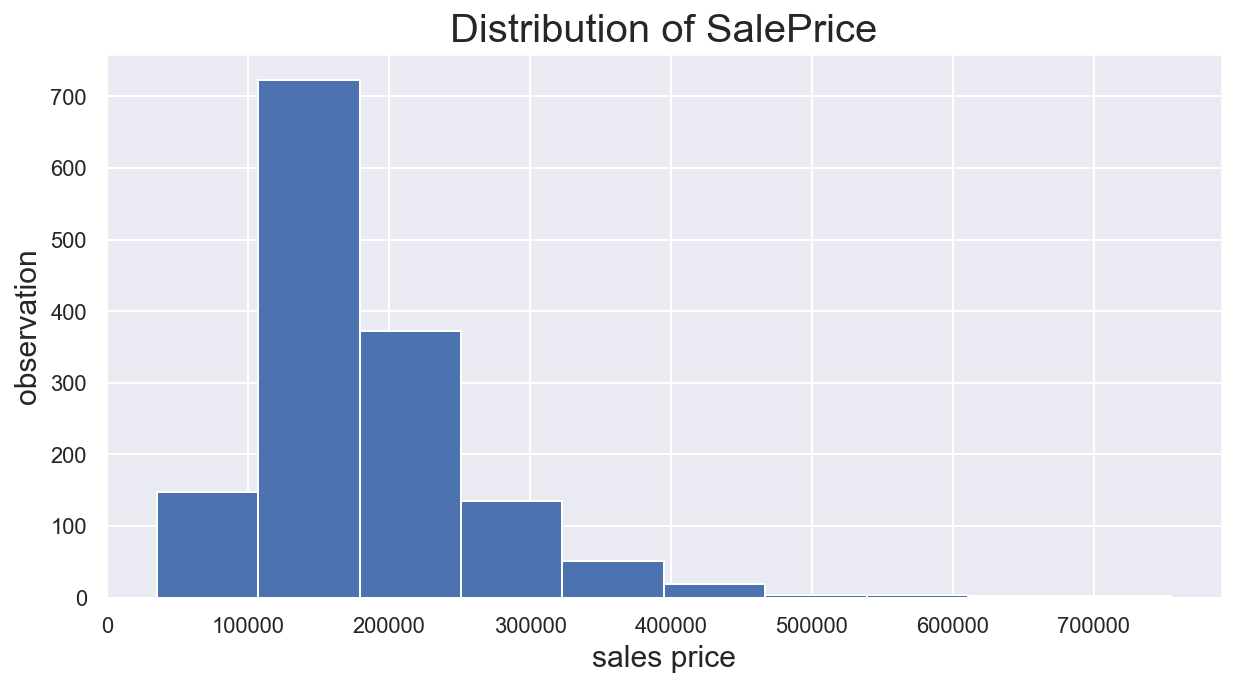

In [4]:
# SalesPrice distribution
print('Skew is:', train['SalePrice'].skew())

plt.figure(figsize=(10, 5))
plt.hist(train['SalePrice'])
plt.title('Distribution of SalePrice', fontsize=20)
plt.ylabel('observation', fontsize=15)
plt.xlabel('sales price', fontsize=15)

plt.show()

Notice that the distribution has a longer tail on the right. The distribution is positively skewed.

Now we use `np.log1p()` to transform SalePrice and calculate the skewness a second time, as well as re-plot the data.

Skew is: 0.12134661989685329


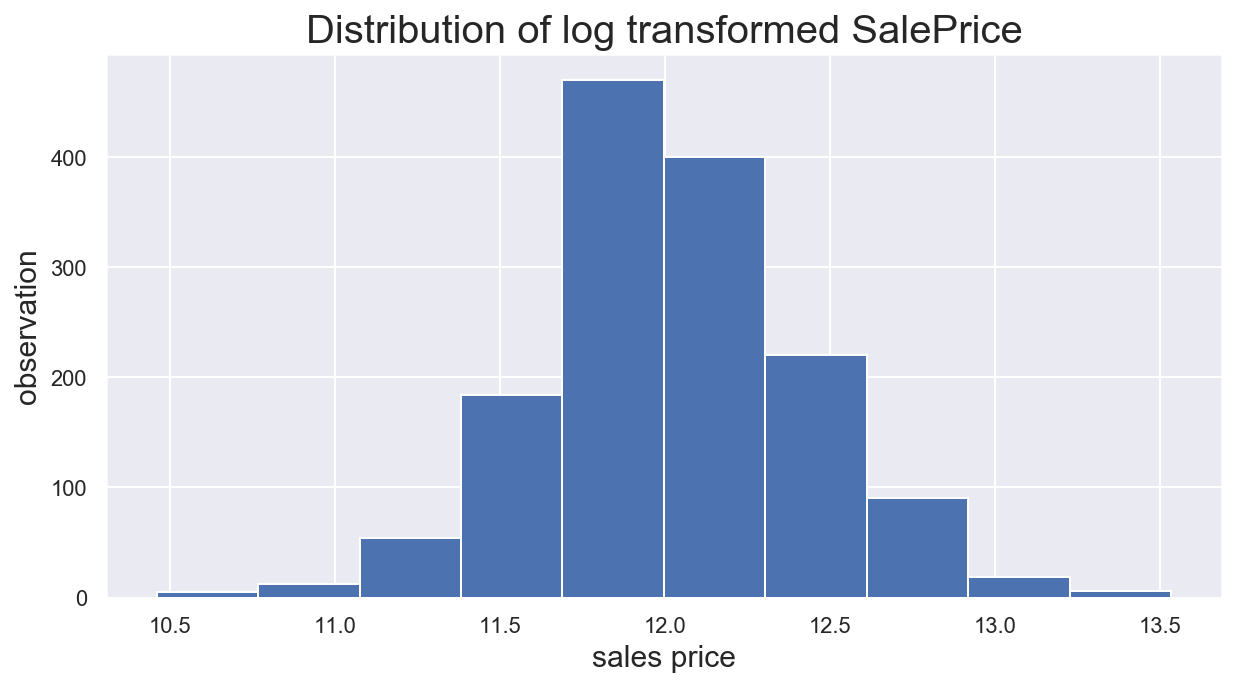

In [5]:
# Log transformed SalesPrice distribution
print('Skew is:', np.log1p(train['SalePrice']).skew())

plt.figure(figsize=(10, 5))
plt.hist(np.log1p(train['SalePrice']), color='b')
plt.title('Distribution of log transformed SalePrice', fontsize=20)
plt.ylabel('observation', fontsize=15)
plt.xlabel('sales price', fontsize=15)

plt.show()

A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

Let's look how the `SalePrice` is changing within the `OverallQual`.

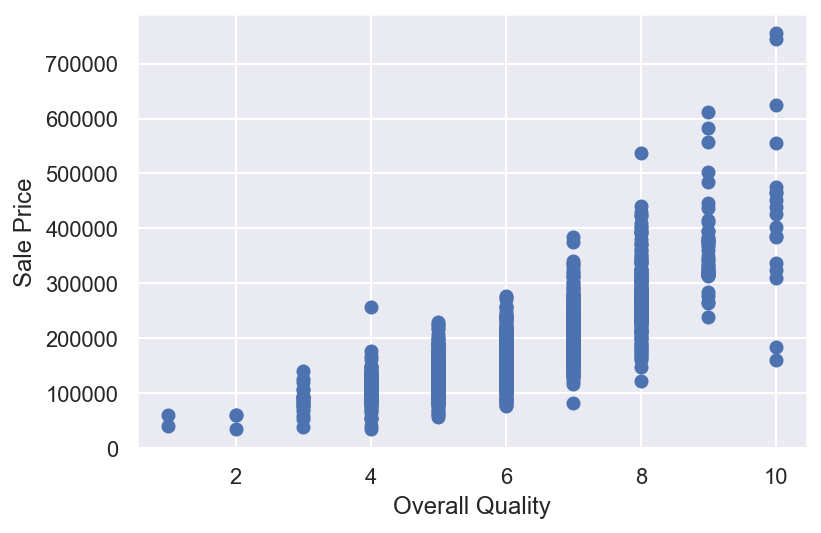

In [6]:
plt.scatter(x=train['OverallQual'], y=train['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)

plt.show()

Notice that the `SalesPrice` strictly increases as Overall Quality increases.

# Seaborn

Now, let's move on to the `Seaborn` library. `seaborn` is essentially a higher-level API based on the `matplotlib` library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare `matplotlib`) require quite a large amount of code.

## distplot()

It is also possible to plot a distribution of observations with `seaborn`'s `distplot()`. For example, let's look at the distribution of `SalePrice`. By default, the plot displays a histogram and the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).

****
params:
* `plt.subplot()` for plotting two or more plots in one figure. **Matplotlib** supports all kind of subplots including 2x1 vertical, 2x1 horizontal or a 2x2 grid.
* `plt.legend()` for signifying the observation variables.
* `plt.tight_layout()` automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
****

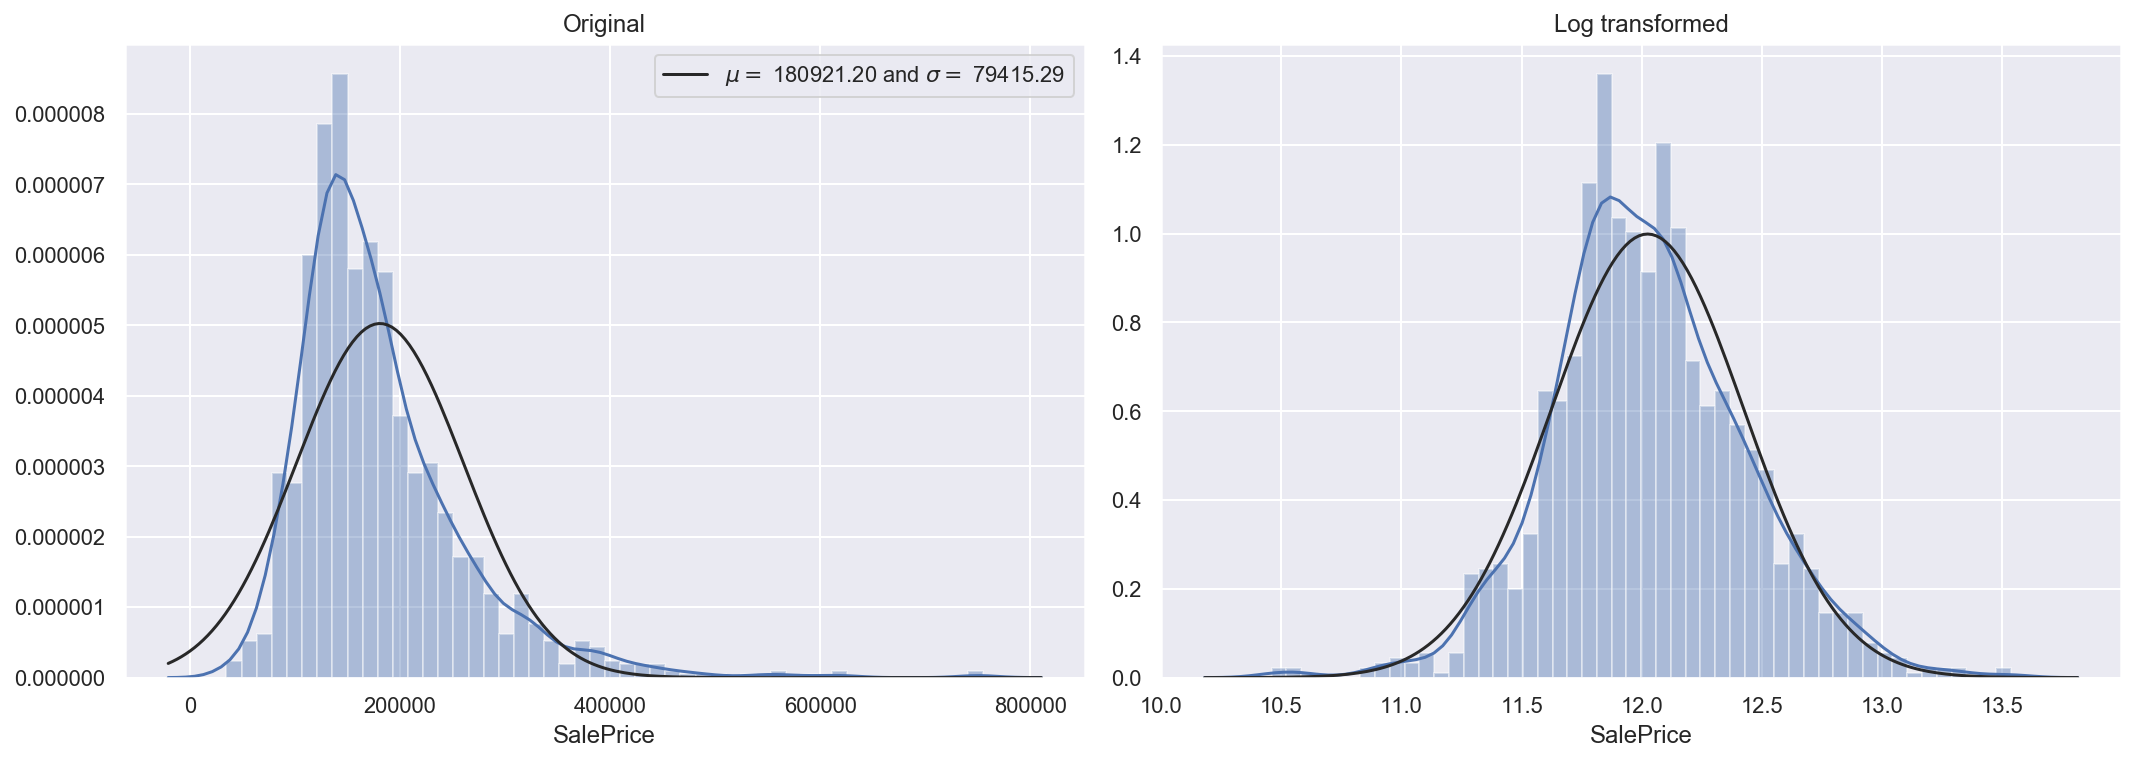

In [7]:
# Graphics in retina format are more sharp and legible
plt.figure(figsize=(15, 10))

# add SalesPrice distribution
plt.subplot(2, 2, 1)
sns.distplot(train.SalePrice, bins=50, fit=norm)
plt.title('Original')
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
           loc='best')

# add Log transformed SalesPrice distribution
plt.subplot(2, 2, 2)
sns.distplot(np.log1p(train.SalePrice), bins=50, fit=norm)
plt.title('Log transformed')

plt.tight_layout()

## barplot()

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

params:
* `x,y,hue` names of variables in *data or vector data*

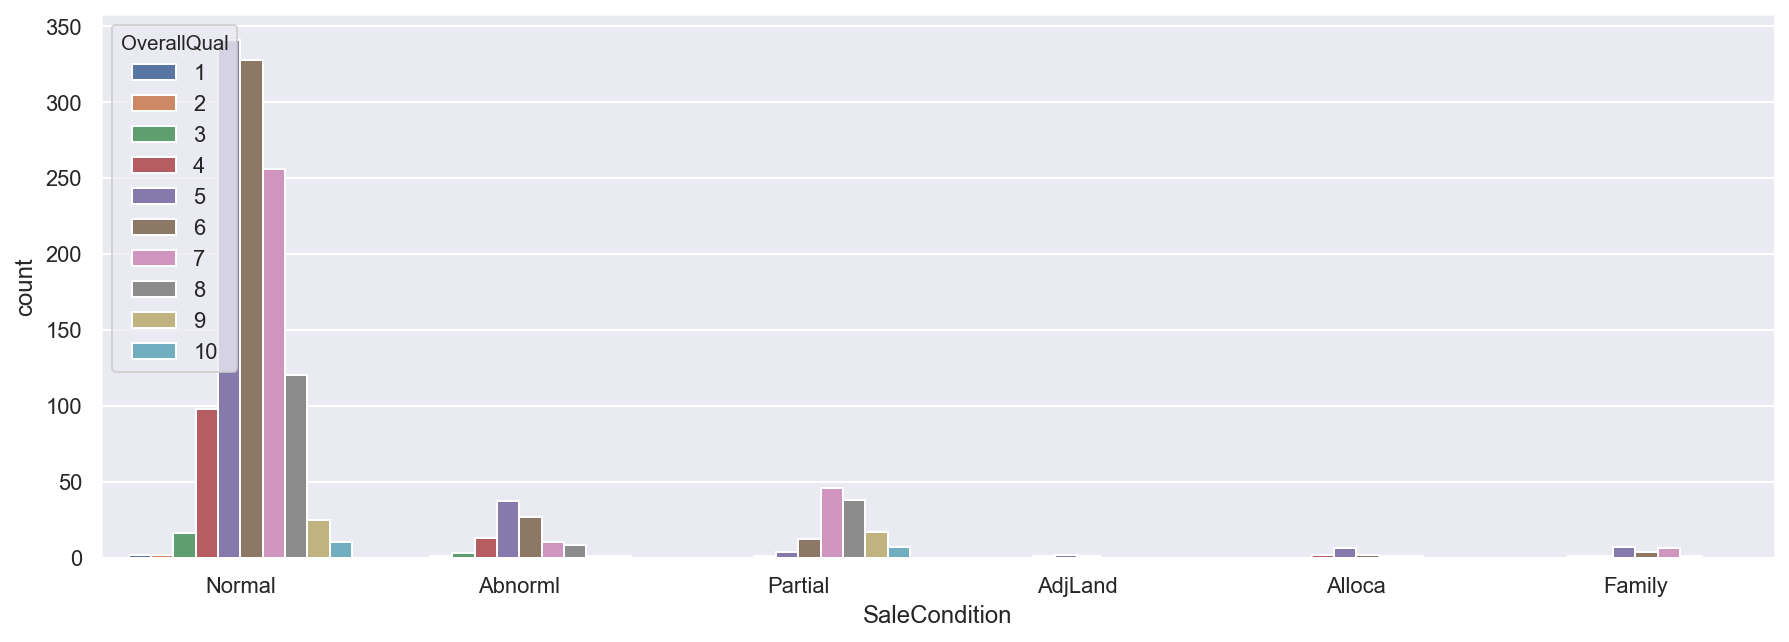

In [8]:
plt.figure(figsize=(15, 5))
sns.countplot(x='SaleCondition', hue='OverallQual', data=train);

The vast majoriy of houses were sold under **Normal** sale condition but **OverallQual** is between *5-7* grade for more than 60% of houses.

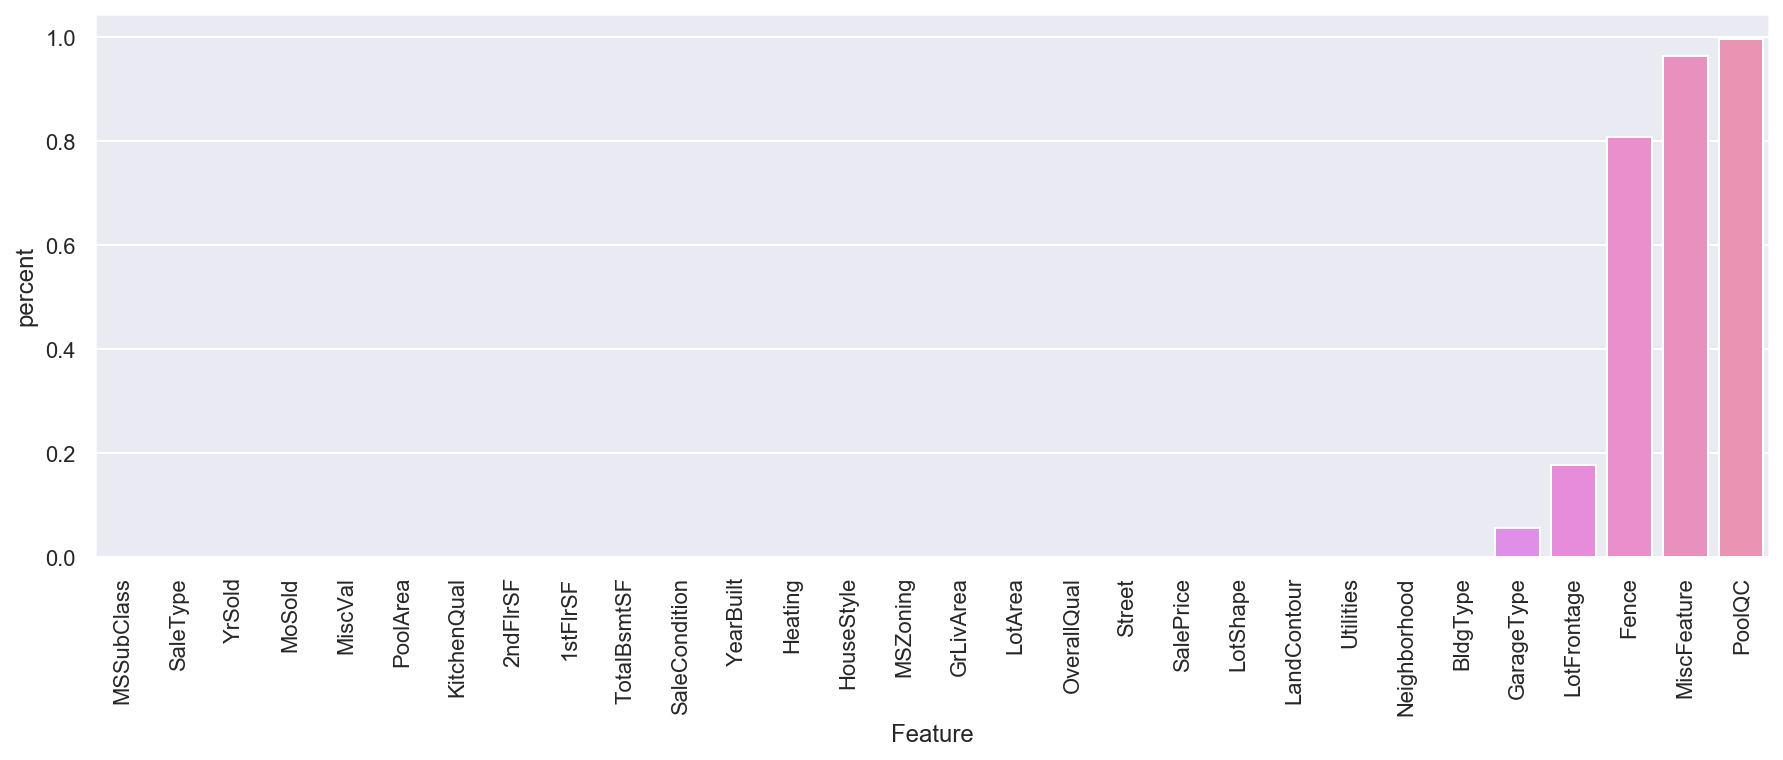

In [9]:
# Let's plot missing values
missing_values = train.isnull().sum() / len(train)
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['percent']
missing_values.index.names = ['Feature']
missing_values['Feature'] = missing_values.index

plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='percent', data=missing_values)
plt.xticks(rotation=90)
plt.show()

We can see that `PoolQC`, `'Fence`, `MiscFeature` featues have almost empty values. `GarageType` and `LotFrontage`should be considered for missing values imputation.

## pairplot()

Let's take a look at the first of such complex plots, a **pairwise relationships plot**, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

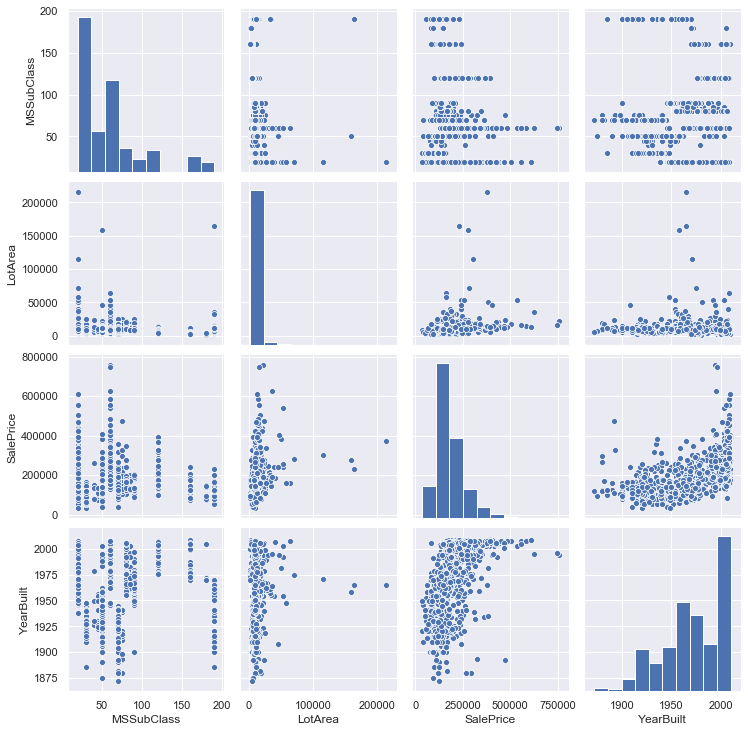

In [10]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

sns.pairplot(
    train[['MSSubClass', 'LotArea', 'SalePrice', 'YearBuilt']])

As you can see, the distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

## scatterplot()

Used to find the relationship between **x** and **y** variable. It may be both a numeric type or one of them a categorical data.

****
* `pd.melt()` function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.
****

In [11]:
# prepare data
f = pd.melt(train[['SalePrice', 'MSZoning', 'LotArea', 'LotFrontage', 'MoSold',
                   'OverallQual', '2ndFlrSF', '1stFlrSF']], 
            id_vars=['SalePrice'])

f 

SalePrice  variable value
0         208500  MSZoning    RL
1         181500  MSZoning    RL
2         223500  MSZoning    RL
3         140000  MSZoning    RL
4         250000  MSZoning    RL
...          ...       ...   ...
10215     175000  1stFlrSF   953
10216     210000  1stFlrSF  2073
10217     266500  1stFlrSF  1188
10218     142125  1stFlrSF  1078
10219     147500  1stFlrSF  1256

[10220 rows x 3 columns]

Le's create a function for plotting multiply *scatterplots within FaceGrid*.

****kwargs:**

The special syntax `**kwargs` in function definitions in python is used to pass a keyworded, variable-length argument list. We use the name kwargs with the double star. The reason is because the double star allows us to pass through keyword arguments (and any number of them).

* A keyword argument is where you provide a name to the variable as you pass it into the function.
* One can think of the kwargs as being a dictionary that maps each keyword to the value that we pass alongside it. That is why when we iterate over the kwargs there doesn’t seem to be any order in which they were printed out

In [10]:
def facetgrid_scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x = plt.xticks(rotation=0)

****
params:
* `sns.FacetGrid()` for performing multi-dimensional analysis:    
  * *data* - dataframe where each column is a variable and each row is an observation
  * *row, col, hue* - variables that define subsets of the data, which will be drawn on separate facets in the grid
  * *col_wrap* - wrap the column variable at this width, so that the column facets span multiple rows
  * *share{x,y}* - if true, the facets will share y axes across columns and/or x axes across rows
  * *height* - height (in inches) of each facet
* `sns.map()` for plotting data on all plots of the grid
****

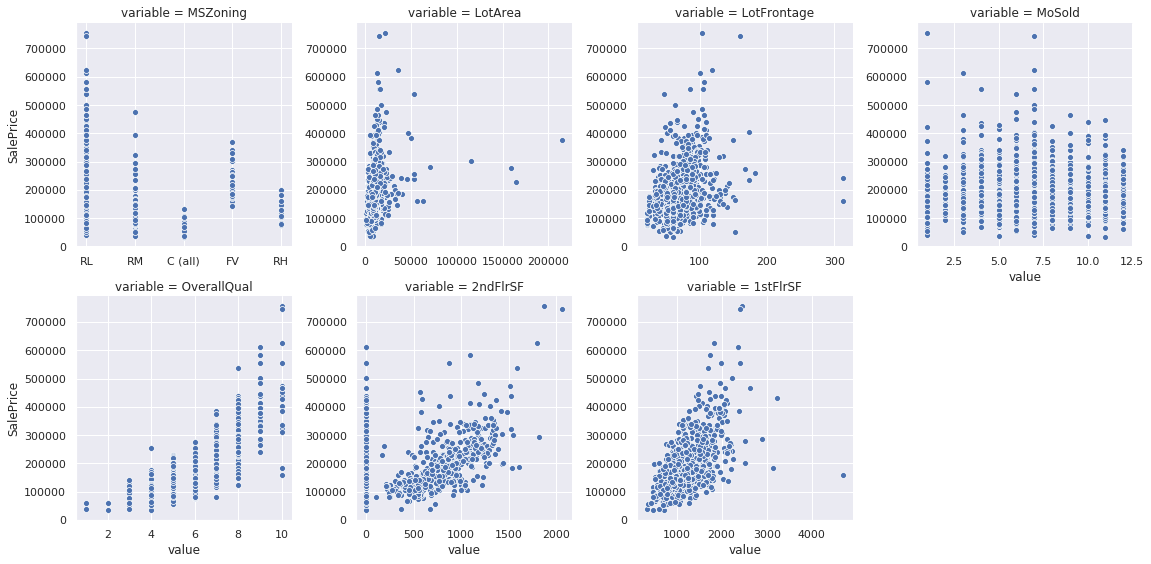

In [11]:
g = sns.FacetGrid(data=f, col='variable', col_wrap=4,
                  sharex=False, sharey=False, height=4)

g = g.map(facetgrid_scatterplot, 'value', 'SalePrice')

## jointplot()

To look more closely at the relationship between two numerical variables, you can use *joint plot*, which is a cross between a scatter plot and histogram. Let's see how the `SalePrice` and `YearBuilt` features are related.

****
params:
* `x, y` data or names of variables in data.
* `data` DataFrame when x and y are variable names.
* `kind`: *{ 'scatter' | 'reg' | 'resid' | 'kde' | 'hex' }* kind of plot to draw.
****

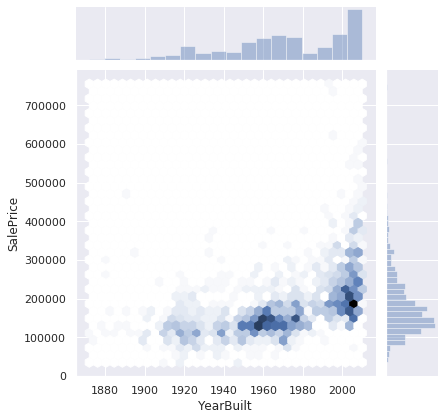

In [12]:
sns.jointplot(x='YearBuilt', y='SalePrice', data=train, kind='hex')

## boxplot()

Another useful type of plot is a *box plot*. Thats very useful when you want to compare data between two groups. Sometimes a boxplot is named a **box-and-whisker** plot. Any box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

****
params:
* `x, y, hue` inputs for plotting long-form data
* `data` dataset for plotting
* `orient`: *{'v', 'h'}* orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.
****

Let's compare `SalePrice` for 5 `MSZoning` categories.

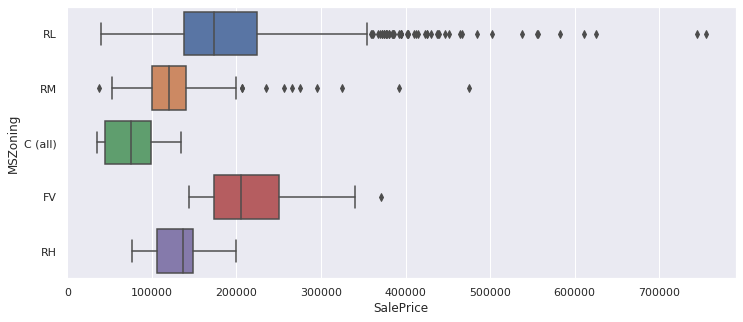

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(y='MSZoning', x='SalePrice', data=train, orient='h')

It is worth spending a bit more time to discuss how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

<img align="center" src="../../img/box_plot.png"  width=75% />

The box by itself illustrates the interquartile spread of the distribution; its length determined by the $25\% \, (\text{Q1})$ and $75\% \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall out of the range bounded by the whiskers are plotted individually.

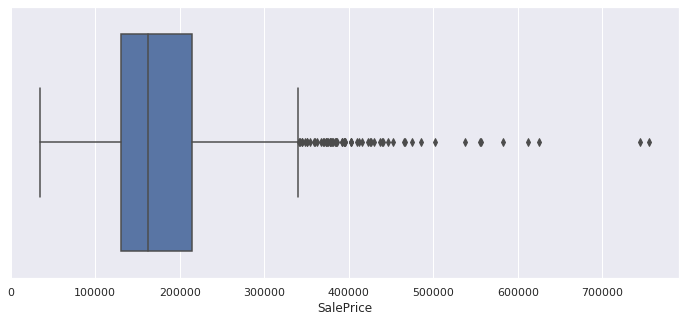

In [14]:
# let's have a look at SalePrice 
plt.figure(figsize=(12, 5))
sns.boxplot(train['SalePrice'],orient='h')

Let's build boxplots for several features:

****
params:
* `sns.FacetGrid()` for performing multi-dimensional analysis:    
  * *data* - dataframe where each column is a variable and each row is an observation
  * *row, col, hue* - variables that define subsets of the data, which will be drawn on separate facets in the grid
  * *col_wrap* - wrap the column variable at this width, so that the column facets span multiple rows
  * *share{x,y}* - if true, the facets will share y axes across columns and/or x axes across rows
  * *height* - height (in inches) of each facet
* `sns.map()` for plotting data on all plots of the grid
****

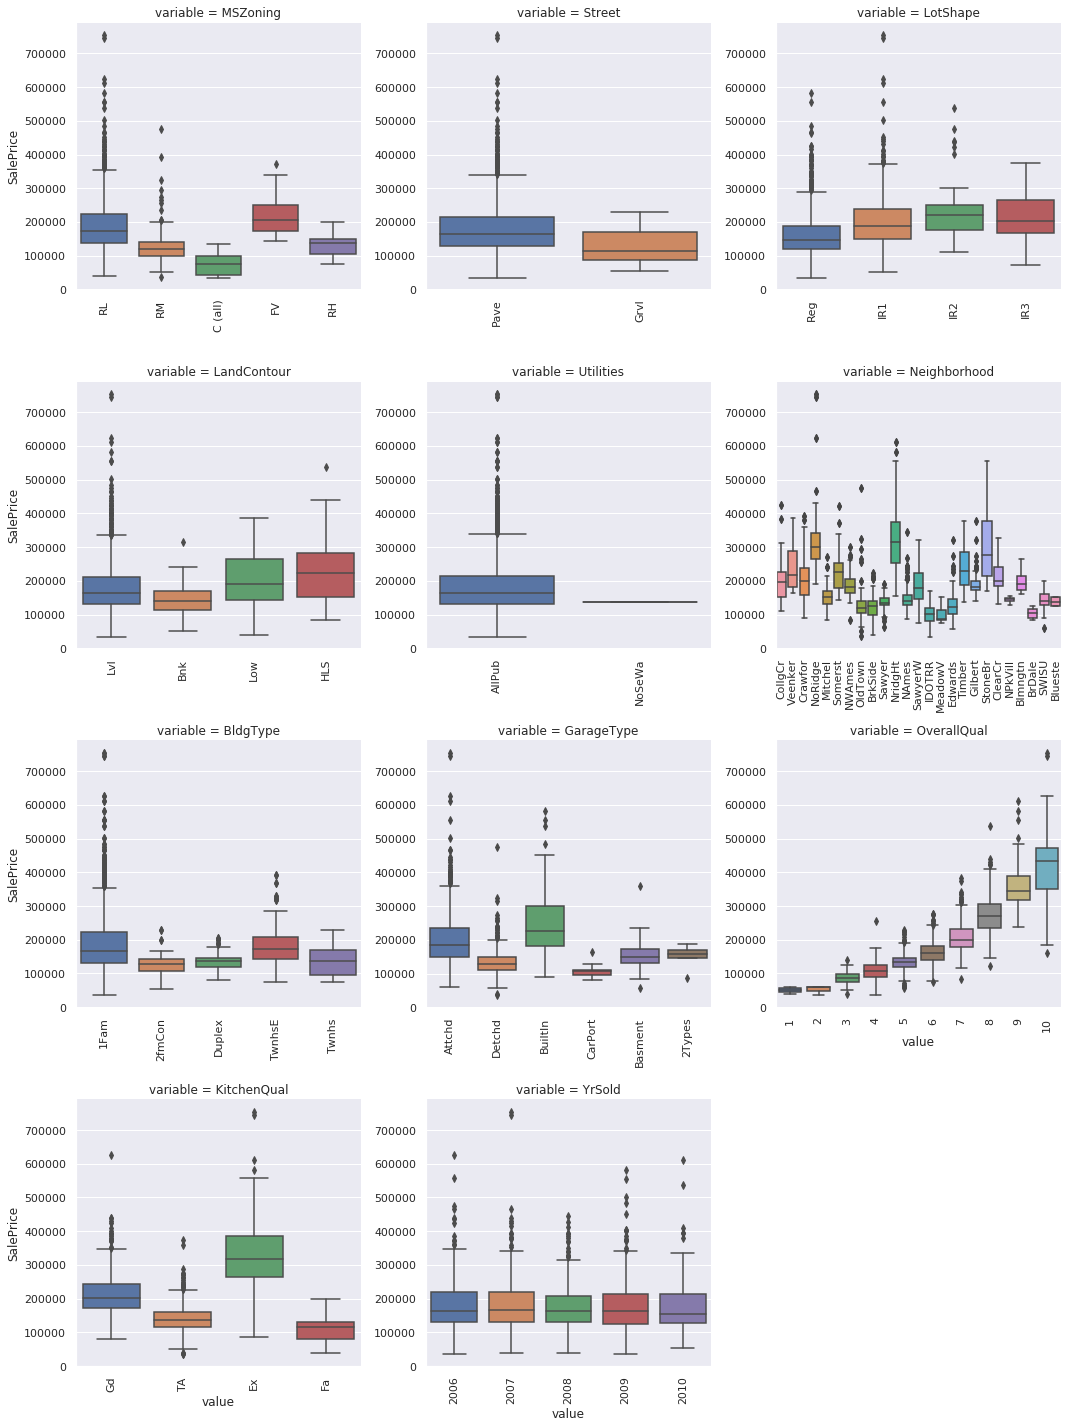

In [15]:
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)


f = pd.melt(train[['SalePrice', 'MSZoning', 'Street', 'LotShape', 'LandContour',
                   'Utilities', 'Neighborhood', 'BldgType', 'GarageType', 'OverallQual',
                   'KitchenQual', 'YrSold', 'BldgType', 'Neighborhood', 'Utilities']], 
            id_vars=['SalePrice'])

g = sns.FacetGrid(f, col='variable', col_wrap=3,
                  sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, 'value', 'SalePrice')

Some categories seem to more diverse with respect to `SalePrice` than others. `Neighborhood` and `OverallQual` has big impact on house prices. There are also differences in variability between category values.

## violinplot()

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

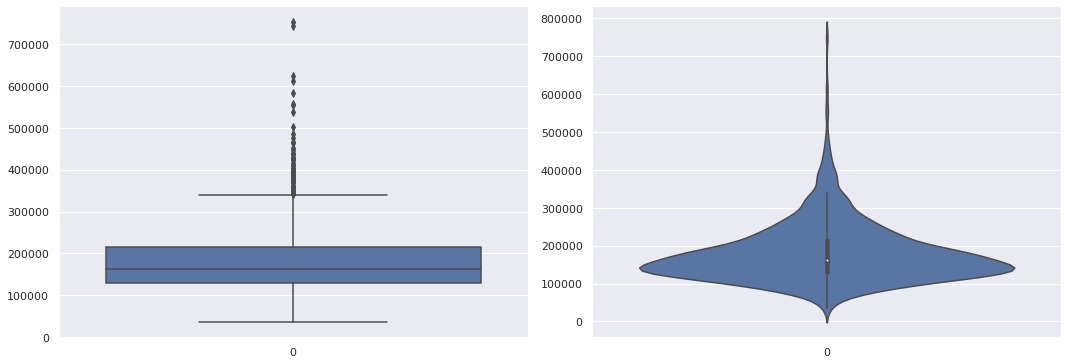

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=train['SalePrice'])

plt.subplot(2, 2, 2)
sns.violinplot(data=train['SalePrice'])

plt.tight_layout()

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.


## heatmap()

The last type of plot that we will cover here is a **heat map**. A heat map allows you to view the distribution of a numerical variable over two categorical ones. 

****
params:
* `data` 2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.
* `cmap` for mapping from data values to color space. If not provided, the default will depend on whether center is set.
* `cbar` whether to draw a colorbar.
* `annot` if True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data.
* `square` if True, set the Axes aspect to 'equal' so each cell will be square-shaped.
* `fmt` string formatting code to use when adding annotations.
* `annot_kws` keyword arguments for ax.text when annot is True.
* `xticklabels, yticklabels` if True, plot the column names of the dataframe. If False, don’t plot the column names.
****

Let's visualize the *SalePrice correlation matrix*.

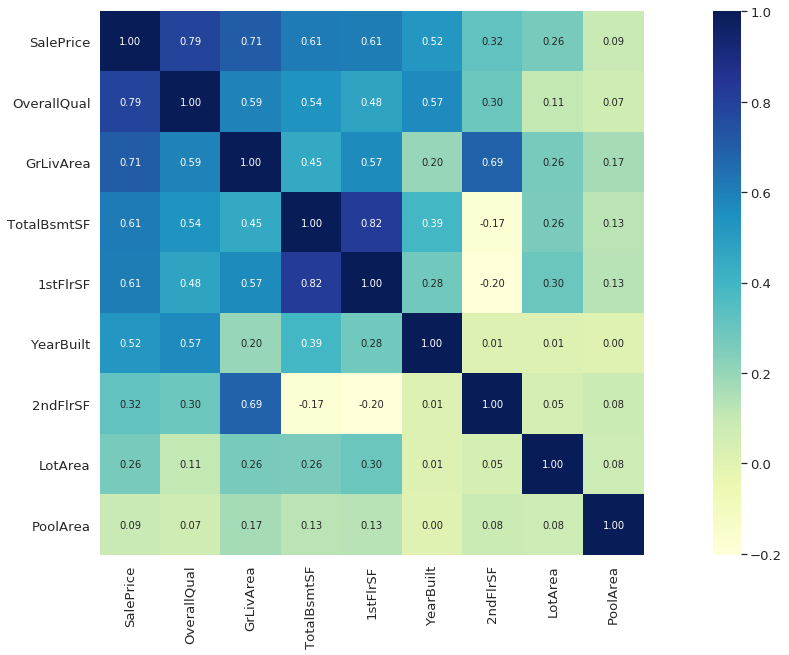

In [17]:
# saleprice correlation matrix
plt.figure(figsize=(25, 10))
k = 9  # number of variables for heatmap
cols = (train.drop('LotFrontage', 1)
        .corr()
        .nlargest(k, 'SalePrice')['SalePrice']
        .index)

cm = np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.2)
hm = sns.heatmap(cm,
                 cmap='YlGnBu',
                 cbar=True, annot=True,
                 square=True, fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

We can see that `OverallQual`, `GrLivArea`, `TotalBsmtSF` and `1stFlrSF`. But `TotalBsmtSF` and `1stFlrSF` look like self correlated features. We can asses the distribution of each feature in more details in order to make a decision to drop one of the or not.

Let's explore the **Average SarePrice by MSZoning and MSSubClass**

****
params:
* `cbar_kws` keyword arguments for colorbar.
* `linewidths` width of the lines that will divide each cell.
****

Let's format Color Bar using `FuncFormatter(func)`. The `FuncFormatter` gives you a very flexible way to define your own (e.g. dynamic) tick label formatting to an axis.

Your custom function should accept **x** and **pos** parameters, where pos is the (positional) number of the tick label that is currently being formatted, and the **x** is the actual value to be (pretty) printe

You can find more on ***Tick locating and formating*** in [matplotlib.ticker](https://matplotlib.org/3.1.3/api/ticker_api.html#matplotlib.ticker.FuncFormatter).

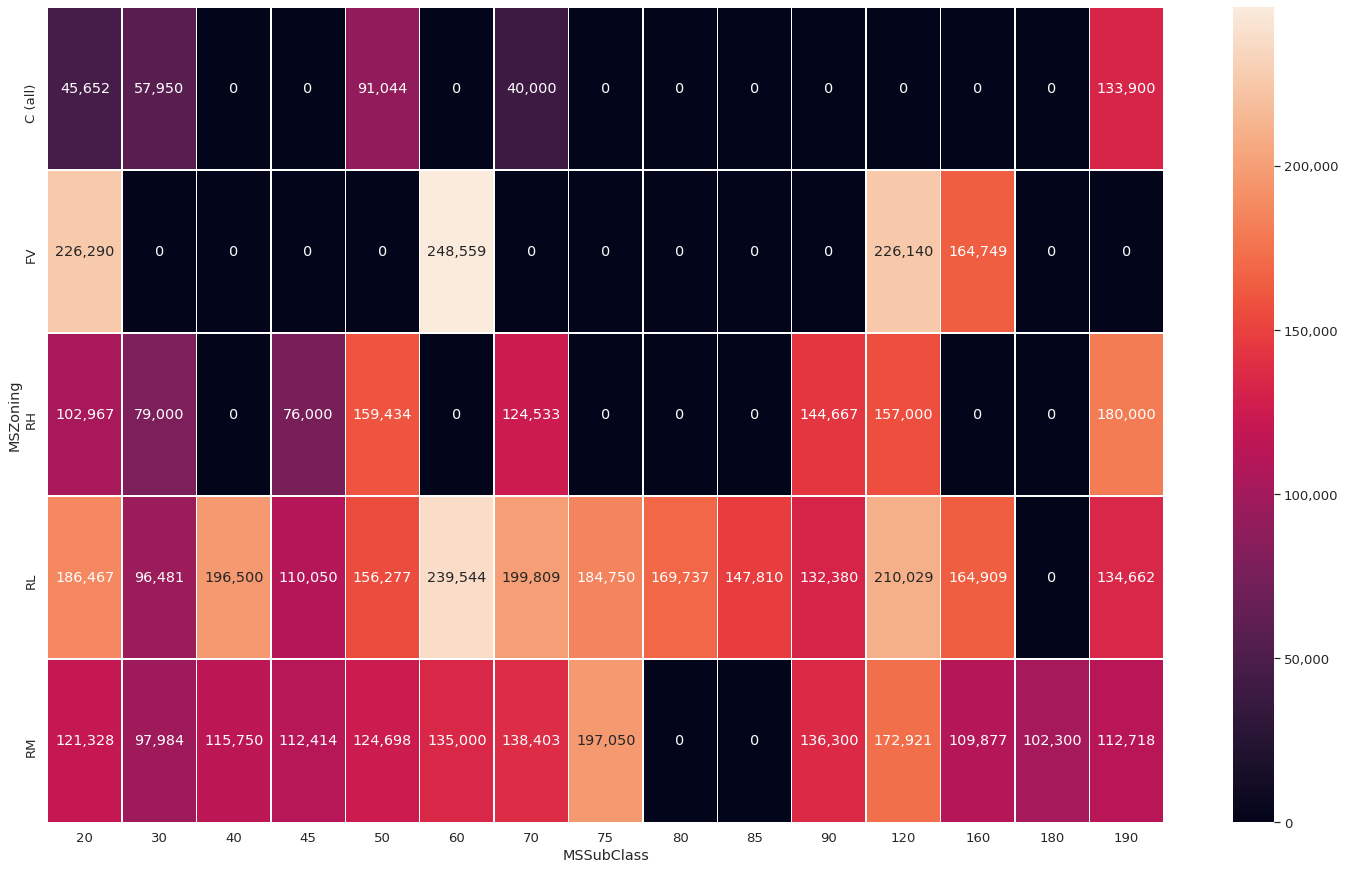

In [18]:
msz_mss_sales = train.pivot_table(
    index='MSZoning',
    columns='MSSubClass',
    values='SalePrice',
    aggfunc=np.mean).fillna(0).applymap(float)

fmt = lambda x,pos: '{:,.0f}'.format(x)

plt.figure(figsize=(25, 15))
           
sns.heatmap(msz_mss_sales,
            annot=True, 
            fmt=',.0f',
            cbar_kws={'format': FuncFormatter(fmt)},
            linewidths=.5)

****
**Summary:**

It is summarized that if `Matplotlib` “tries to make easy things easy and hard things possible”, `Seaborn` tries to make a well defined set of hard things easy too.”

`Seaborn` helps resolve the two major problems faced by Matplotlib; the problems are

* Default Matplotlib parameters
* Working with data frames

As Seaborn compliments and extends Matplotlib, the learning curve is quite gradual. If you know Matplotlib, you are already half way through Seaborn.

Important Features of Seaborn:
It's built on top of Python’s core visualization library Matplotlib. It is meant to serve as a complement, and not a replacement. However, Seaborn comes with some very important features:

* Built in themes for styling matplotlib graphics
* Visualizing univariate and bivariate data
* Fitting in and visualizing linear regression models
* Seaborn works well with NumPy and Pandas data structures

# Plotly

We have examined some visualization tools based on the `matplotlib` and `seaborn` libraries. However, this is not the only option for plotting in `Python`. Let's take a look at the `plotly` library. Plotly is an open-source library that allows creation of interactive plots within a Jupyter notebook without having to use Javascript.

The real beauty of interactive plots is that they provide a user interface for detailed data exploration. For example, you can see exact numerical values by mousing over points, hide uninteresting series from the visualization, zoom in onto a specific part of the plot, etc.

Before we start,  import all the necessary modules and initialize `plotly` by calling the `init_notebook_mode()` function.

`Figure` is the main class and a work horse of visualization in `plotly`. It consists of the data (an array of lines called `traces` in this library) and the style (represented by the `layout` object). In the simplest case, you may call the `iplot` function to return only `traces`.

The `show_link` parameter toggles the visibility of the links leading to the online platform `plot.ly` in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing `show_link=False` to prevent accidental clicks on those links.

## lineplot

First of all, `line plot` displays information as a series of data points called ‘markers’ connected by straight line segments.

Let's build a **line plot** showing *Average SalePrice and Houses Amount by YearBuilt*

****
params:
* `make_subplots()` per subplot specifications of subplot type, row/column spanning, and spacing
* `add_trace` add a trace to the figure
* `go.Scatter()`:
  * `x, y` sets of x,y coordinates
  * `name` name of the plot
  * `secondary_y` add second y axes
* `update_xaxes(), update_yaxes()` customization for title, font, range, grid style, etc.
* `update_layout()` method that may be used to update multiple nested properties of a figure's layout like *title_text*, *title_font_size* and etc.
* `iplot()` plots the figure(fig) that is created by data and layout
****

In [19]:
# prepare data
years_df = (train.groupby('YearBuilt')[['SalePrice']]
            .mean().join(train
                         .groupby('YearBuilt')[['Street']].count()))

years_df.columns = ['SalePrice', 'Street']

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Create a line (trace) for SalePrice
fig.add_trace(go.Scatter(
    x=years_df.index,
    y=years_df['SalePrice'],
    name='Average SalePrice'),
    secondary_y=False
)

# Create a line (trace) for amount of houses
fig.add_trace(go.Scatter(
    x=years_df.index,
    y=years_df['Street'],
    name='Amount of houses'),
    secondary_y=True
)

# Set x-axis title
fig.update_xaxes(title_text="YearBuilt")

# Add figure title
fig.update_layout(
    title_text='Average SalePrice and Houses Amount by YearBuilt'
)

fig.update_yaxes(secondary_y=True)
iplot(fig)

## scatterplot
A `scatter plot` is a set of points plotted on a horizontal and vertical axes. Scatter plots are important in statistics because they can show the extent of correlation, if any, between the values of observed quantities or phenomena (called variables).

Let's look on *SalePrice by YearBuilt and Heating*.

****
params:
* `go.Scatter()`:
  * `mode` determines the drawing mode for this scatter trace. Could be 'lines', 'markers', 'lines+markers', 'lines+markers+text'
  * `row` if there is a layout grid, use the domain for this row in the grid for this pie trace
  * `col`ff there is a layout grid, use the domain for this column in the grid for this pie trace
****

In [20]:
fig = make_subplots(rows=1, cols=2)

# Top left plot
fig.add_trace(
    go.Scatter(
        x=train['YearBuilt'],
        y=train['SalePrice'], 
        name='SalePrice by YearBuilt',
     mode='markers'),
    row=1, col=1)


# Top right plot
fig.add_trace(
    go.Scatter(        
        x=train['Heating'],
        y=train['SalePrice'], 
        name='SalePrice by Heating',
     mode='markers'),
    row=1, col=2
)

iplot(fig)

Let's plot *SalePrice by GrLivArea with OverallQual pointer*

****
params:
* `go.Scatter()`:
  * `marker()`:
    * `size` sets the marker size
    * `color` sets the marker color
    * `colorscale` sets the colorscale
    * `showscale` determines whether or not a colorbar is displayed for this trace.
****

In [21]:
fig = go.Figure(data=go.Scatter(
    x=train['GrLivArea'],
    y = train['SalePrice'],
    mode='markers',
    marker=dict(
        size=16,
        color=train['OverallQual'],
        colorscale='Viridis',
        showscale=True
    )
))

fig.show()

Let's plot the unique values in data set

In [22]:
# prepare data
n_unique = []
for column in train:
    n_unique.append(len(train[column].unique()))
unique_features_len = pd.Series(n_unique, index=train.columns)

# prepare plot
fig = go.Figure(
    data=go.Scatter(
        x=unique_features_len.values,
        y=unique_features_len.index,
        mode='markers',
        marker=dict(
            size=18,
            color=np.random.randn(29),
            colorscale='Viridis')),
    layout=go.Layout(
    title='Unique Features',
    xaxis=dict(
        title='Count')))

iplot(fig)

From the graph above we can see that there are several features with more than **600 unique values**, it is a regression analysis afterall. Along with that there are alot of categorical features. 

With this many unique and categorical features theres bound to be few missing values in the data set lets, visualize them.

In [23]:
missingA = pd.Series(train.isnull().sum())
missingA = missingA[missingA > 0]

missingB = pd.Series(test.isnull().sum())
missingB = missingB[missingB > 0]

print('Rows in train:', train.shape[0])
print('Rows in test:', test.shape[0])

trace = go.Scatter(
    x=missingA.values,
    y=missingA.index,
    mode='markers',
    marker=dict(
        size=14,
        color=np.random.randn(len(missingA))),
    name='Train data'
)

trace1 = go.Scatter(
    x=missingB.values,
    y=missingB.index,
    mode='markers',
    marker=dict(
        size=14,
        color='black'),
    opacity=0.5,
    name='Test data'
)

layout = go.Layout(
    title='Missing Feature Values',
    xaxis=dict(
        title='Count')
)

fig = go.Figure(data=[trace, trace1], layout=layout)
iplot(fig)

Rows in train: 1460
Rows in test: 1459


Thats alot of missing values to fix. At the very start there are many categorical features which are very low (less than 20) and more than 40 and higher missing values in both traind and test set.

Let's build **GrLivArea vs Sale Price** and **Lot Area vs Sale Price** plot using `Plotly Express` - is the easy-to-use, high-level interface to Plotly, which operates on "tidy" data and produces easy-to-style figures.

In order to use trendline statsmodels package should be installed:     
`pip install statsmodels`

In [24]:
# GrLivArea vs Sale Price
fig = px.scatter(train, x='GrLivArea', y='SalePrice', trendline='ols')
fig.update_layout(title='GrLivArea vs Sale Price')
iplot(fig)

**GrLivArea** shows quite a bit of lineararity with Sale Price. There are few outliers those points are having too high Ground Living Area for too low SalePrice.This can also be seen by looking at the 'OLS trendline' going slightly downward because of those points, Therefore should be excluded.

In [25]:
# Lot Area vs Sale Price
fig = px.scatter(train, x='LotArea', y='SalePrice', trendline='ols')
fig.update_layout(title='LotArea vs Sale Price')
iplot(fig)

This graph indicates that the **LotArea** ranges from *0 to 45k~ Sq. ft*. The 'OLS trendline' shows us that due to the lines shown outside the boundary line there is a massive effect on the 'Regression line'. Another note can be observed that there are a few points where the prices are way too high.

## heatmap

Let's plot *KitchenQual by YrSold with OverallQual pointer*

In [26]:
fig = go.Figure(data=go.Heatmap(
    z=train['OverallQual'],
    x=train['KitchenQual'],
    y=train['YrSold'],
    colorscale='Viridis'))

fig.update_layout(
    title='KitchenQual by YrSold ')

iplot(fig)

## box
A boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines either side of the rectangle.

In [27]:
trace0 = go.Box(y=train['GrLivArea'], name='GrLivArea')
trace1 = go.Box(y=train['1stFlrSF'], name='1stFlrSF')
trace2 = go.Box(y=train['2ndFlrSF'], name='2ndFlrSF')
data = [trace0, trace1, trace2]
iplot(data)

## violin
A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side.

In [28]:
fig = px.violin(train, y="GrLivArea",
                box=True,  # draw box plot inside the violin
                points='all',  # can be 'outliers', or False
                )
iplot(fig)

## parallel_categories
The parallel categories diagram (also known as parallel sets or alluvial diagram) is a visualization of multi-dimensional categorical data sets. Each variable in the data set is represented by a column of rectangles, where each rectangle corresponds to a discrete value taken on by that variable. The relative heights of the rectangles reflect the relative frequency of occurrence of the corresponding value.

Combinations of category rectangles across dimensions are connected by ribbons, where the height of the ribbon corresponds to the relative frequency of occurrence of the combination of categories in the data set.

In [29]:
fig = px.parallel_categories(
    data_frame=train,
    dimensions=['MSZoning', 'Street', 'LotShape',
                'BldgType', 'GarageType', 'KitchenQual', 'BldgType', 'Utilities'],
    color="OverallQual",
    color_continuous_scale=px.colors.sequential.Inferno)

iplot(fig)

## scatterplot_matrix
Scatterplot matrix contains all the pairwise scatter plots of the variables on a single page in a matrix format. That is, if there are k variables, the scatterplot matrix will have k rows and k columns and the ith row and jth column of this matrix is a plot of Xi versus Xj.

****
param:
* `diag` sets the chart type for the main diagonal plots. The options are 'scatter', 'histogram' and 'box'.
****

In [30]:
feats = ['SalePrice', 'MSZoning', '2ndFlrSF',
         'TotalBsmtSF', 'GrLivArea', 'LotArea']

fig = ff.create_scatterplotmatrix(
    train[feats], index='SalePrice',
    diag='box', size=2, height=800, width=800)

iplot(fig)

# Useful resources
- The same notebook as an interactive web-based [GitHub: mlcourse_dubai](https://github.com/DmitriiDenisov/mlcourse_dubai)
- ["Plotly for interactive plots"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/plotly_tutorial_for_interactive_plots_sankovalev.ipynb) - a tutorial by Alexander Kovalev within mlcourse.ai (full list of tutorials is [here](https://mlcourse.ai/tutorials))
- ["Bring your plots to life with Matplotlib animations"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/bring_your_plots_to_life_with_matplotlib_animations_kyriacos_kyriacou.ipynb) - a tutorial by Kyriacos Kyriacou within mlcourse.ai
- ["Some details on Matplotlib"](https://nbviewer.jupyter.org/github/Yorko/mlcourse.ai/blob/master/jupyter_english/tutorials/some_details_in_matplotlib_pisarev_ivan.ipynb) - a tutorial by Ivan Pisarev within mlcourse.ai
- Open Machine Learning Course [site](https://mlcourse.ai) 
- Here is the official documentation for the libraries we used: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html), [`plotly`](https://plotly.com/python/) and [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- The [gallery](http://seaborn.pydata.org/examples/index.html) of sample charts created with `seaborn` is a very good resource.